In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/talib-package/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl
/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-excha

In [6]:
# %cd /kaggle/working

In [7]:
# from IPython.display import FileLink
# FileLink(r'train_alot_of_features.csv')

In [8]:
!pip install ../input/talib-package/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl
import talib as ta 

Processing /kaggle/input/talib-package/talib_binary-0.4.19-cp37-cp37m-manylinux1_x86_64.whl


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from lightgbm import early_stopping
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
import missingno as msno

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit 

import statsmodels.api as sm
from pylab import rcParams

from tqdm import tqdm

import optuna
from optuna.integration import LightGBMPruningCallback

from talib import abstract

import plotly.graph_objects as go

import time
import gc
import sys


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# sys.path.insert(0, '../input/jpx-local-api')
# from local_api import local_api

In [10]:
def get_ta_features(df, inf=None, train=True):
    """
    Get technical features from TA-Lib
    ref : https://www.kaggle.com/code/daosword/jpx-pytorch-neural-network-with-ta-lib-features
    """
    if train:
        op = df['Open']
        hi = df['High']
        lo = df['Low']
        cl = df['Close']
        vo = df['Volume']

    #     # Overlap Studies
    #     df['BBANDS_upper'], df['BBANDS_middle'], df['BBANDS_lower'] = ta.BBANDS(cl, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    #     df['DEMA'] = ta.DEMA(cl, timeperiod=30)
        
        df['EMA7'] = ta.EMA(cl, 7)/cl
        df['EMA15'] = ta.EMA(cl, 15)/cl
        df['EMA30'] = ta.EMA(cl, 30)/cl
        df['EMA90'] = ta.EMA(cl, 90)/cl

    #     df['HT_TRENDLINE'] = ta.HT_TRENDLINE(cl)
    #     df['KAMA'] = ta.KAMA(cl, timeperiod=30)
    #     df['MA'] = ta.MA(cl, timeperiod=30, matype=0)
    #     df['MIDPOINT'] = ta.MIDPOINT(cl, timeperiod=14)
    #     df['SAR'] = ta.SAR(hi, lo, acceleration=0, maximum=0)
    #     df['SAREXT'] = ta.SAREXT(hi, lo, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
    #     df['SMA'] = ta.SMA(cl, timeperiod=30)
    #     df['T3'] = ta.T3(df['Close'], timeperiod=5, vfactor=0)
    #     df['TEMA'] = ta.TEMA(df['Close'], timeperiod=30)
    #     df['TRIMA'] = ta.TRIMA(df['Close'], timeperiod=30)
    #     df['WMA'] = ta.WMA(df['Close'], timeperiod=30)

        # Momentum Indicators
    #     df['ADX'] = ta.ADX(hi, lo, cl, timeperiod=14)
    #     df['ADXR'] = ta.ADXR(hi, lo, cl, timeperiod=14)
    #     df['APO'] = ta.APO(cl, fastperiod=12, slowperiod=26, matype=0)
    #     df['AROON_down'], df['AROON_up'] = ta.AROON(hi, lo, timeperiod=14)
    #     df['AROONOSC'] = ta.AROONOSC(hi, lo, timeperiod=14)
    #     df['BOP'] = ta.BOP(op, hi, lo, cl)
    #     df['CCI'] = ta.CCI(hi, lo, cl, timeperiod=14)
    #     df['DX'] = ta.DX(hi, lo, cl, timeperiod=14)
    #     df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = ta.MACD(cl, fastperiod=12, slowperiod=26, signalperiod=9)
    #     df['MFI'] = ta.MFI(hi, lo, cl, vo, timeperiod=14)
    #     df['MINUS_DI'] = ta.MINUS_DI(hi, lo, cl, timeperiod=14)
    #     df['MINUS_DM'] = ta.MINUS_DM(hi, lo, timeperiod=14)
        df['MOM'] = ta.MOM(cl, timeperiod=10)
    #     df['PLUS_DI'] = ta.PLUS_DI(hi, lo, cl, timeperiod=14)
    #     df['PLUS_DM'] = ta.PLUS_DM(hi, lo, timeperiod=14)
        df['RSI'] = ta.RSI(cl, timeperiod=14)
        df['STOCH_slowk'], df['STOCH_slowd'] = ta.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
        df['STOCHF_fastk'], df['STOCHF_fastd'] = ta.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)
        df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = ta.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    #     df['TRIX'] = ta.TRIX(cl, timeperiod=30)
    #     df['ULTOSC'] = ta.ULTOSC(hi, lo, cl, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    #     df['WILLR'] = ta.WILLR(hi, lo, cl, timeperiod=14)

        # Volume Indicators
    #     df['AD'] = ta.AD(hi, lo, cl, vo)
    #     df['ADOSC'] = ta.ADOSC(hi, lo, cl, vo, fastperiod=3, slowperiod=10)
    #     df['OBV'] = ta.OBV(cl, vo)

        # Volatility Indicators
        df['ATR'] = ta.ATR(hi, lo, cl, timeperiod=14)
        df['NATR'] = ta.NATR(hi, lo, cl, timeperiod=14)
        df['TRANGE'] = ta.TRANGE(hi, lo, cl)

        # Cycle Indicators
    #     df['HT_DCPERIOD'] = ta.HT_DCPERIOD(cl)
    #     df['HT_DCPHASE'] = ta.HT_DCPHASE(cl)
    #     df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = ta.HT_PHASOR(cl)
    #     df['HT_SINE_sine'], df['HT_SINE_leadsine'] = ta.HT_SINE(cl)
    #     df['HT_TRENDMODE'] = ta.HT_TRENDMODE(cl)

        # Statistic Functions
    #     df['BETA'] = ta.BETA(hi, lo, timeperiod=5)
    #     df['CORREL'] = ta.CORREL(hi, lo, timeperiod=30)
    #     df['LINEARREG'] = ta.LINEARREG(cl, timeperiod=14) - cl
    #     df['LINEARREG_ANGLE'] = ta.LINEARREG_ANGLE(cl, timeperiod=14)
    #     df['LINEARREG_INTERCEPT'] = ta.LINEARREG_INTERCEPT(cl, timeperiod=14) - cl
    #     df['LINEARREG_SLOPE'] = ta.LINEARREG_SLOPE(cl, timeperiod=14)
        df['STDDEV'] = ta.STDDEV(cl, timeperiod=5, nbdev=1)   
    
    
    else: #inference 
        op = inf['Open']
        hi = inf['High']
        lo = inf['Low']
        cl = inf['Close']
        vo = inf['Volume']
        
            #     # Overlap Studies
    #     df['BBANDS_upper'], df['BBANDS_middle'], df['BBANDS_lower'] = ta.BBANDS(cl, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    #     df['DEMA'] = ta.DEMA(cl, timeperiod=30)

        
        df['EMA7'] = (ta.EMA(cl, 7)/cl).iloc[-1]
        df['EMA15'] = (ta.EMA(cl, 15)/cl).iloc[-1]
        df['EMA30'] = (ta.EMA(cl, 30)/cl).iloc[-1]
        df['EMA90'] = (ta.EMA(cl, 90)/cl).iloc[-1]

    #     df['HT_TRENDLINE'] = ta.HT_TRENDLINE(cl)
    #     df['KAMA'] = ta.KAMA(cl, timeperiod=30)
    #     df['MA'] = ta.MA(cl, timeperiod=30, matype=0)
    #     df['MIDPOINT'] = ta.MIDPOINT(cl, timeperiod=14)
    #     df['SAR'] = ta.SAR(hi, lo, acceleration=0, maximum=0)
    #     df['SAREXT'] = ta.SAREXT(hi, lo, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
    #     df['SMA'] = ta.SMA(cl, timeperiod=30)
    #     df['T3'] = ta.T3(df['Close'], timeperiod=5, vfactor=0)
    #     df['TEMA'] = ta.TEMA(df['Close'], timeperiod=30)
    #     df['TRIMA'] = ta.TRIMA(df['Close'], timeperiod=30)
    #     df['WMA'] = ta.WMA(df['Close'], timeperiod=30)

        # Momentum Indicators
    #     df['ADX'] = ta.ADX(hi, lo, cl, timeperiod=14)
    #     df['ADXR'] = ta.ADXR(hi, lo, cl, timeperiod=14)
    #     df['APO'] = ta.APO(cl, fastperiod=12, slowperiod=26, matype=0)
    #     df['AROON_down'], df['AROON_up'] = ta.AROON(hi, lo, timeperiod=14)
    #     df['AROONOSC'] = ta.AROONOSC(hi, lo, timeperiod=14)
    #     df['BOP'] = ta.BOP(op, hi, lo, cl)
    #     df['CCI'] = ta.CCI(hi, lo, cl, timeperiod=14)
    #     df['DX'] = ta.DX(hi, lo, cl, timeperiod=14)
    #     df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = ta.MACD(cl, fastperiod=12, slowperiod=26, signalperiod=9)
    #     df['MFI'] = ta.MFI(hi, lo, cl, vo, timeperiod=14)
    #     df['MINUS_DI'] = ta.MINUS_DI(hi, lo, cl, timeperiod=14)
    #     df['MINUS_DM'] = ta.MINUS_DM(hi, lo, timeperiod=14)
        df['MOM'] = ta.MOM(cl, timeperiod=10).iloc[-1]
    #     df['PLUS_DI'] = ta.PLUS_DI(hi, lo, cl, timeperiod=14)
    #     df['PLUS_DM'] = ta.PLUS_DM(hi, lo, timeperiod=14)
        df['RSI'] = ta.RSI(cl, timeperiod=14).iloc[-1]
        df['STOCH_slowk'], df['STOCH_slowd'] = (ta.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[0].iloc[-1],
                                                ta.STOCH(hi, lo, cl, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)[1].iloc[-1])
        df['STOCHF_fastk'], df['STOCHF_fastd'] = (ta.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)[0].iloc[-1],
                                                  ta.STOCHF(hi, lo, cl, fastk_period=5, fastd_period=3, fastd_matype=0)[1].iloc[-1])
        df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = (ta.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)[0].iloc[-1],
                                                      ta.STOCHRSI(cl, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)[1].iloc[-1])
    #     df['TRIX'] = ta.TRIX(cl, timeperiod=30)
    #     df['ULTOSC'] = ta.ULTOSC(hi, lo, cl, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    #     df['WILLR'] = ta.WILLR(hi, lo, cl, timeperiod=14)

        # Volume Indicators
    #     df['AD'] = ta.AD(hi, lo, cl, vo)
    #     df['ADOSC'] = ta.ADOSC(hi, lo, cl, vo, fastperiod=3, slowperiod=10)
    #     df['OBV'] = ta.OBV(cl, vo)

        # Volatility Indicators
        df['ATR'] = ta.ATR(hi, lo, cl, timeperiod=14).iloc[-1]
        df['NATR'] = ta.NATR(hi, lo, cl, timeperiod=14).iloc[-1]
        df['TRANGE'] = ta.TRANGE(hi, lo, cl).iloc[-1]

        # Cycle Indicators
    #     df['HT_DCPERIOD'] = ta.HT_DCPERIOD(cl)
    #     df['HT_DCPHASE'] = ta.HT_DCPHASE(cl)
    #     df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = ta.HT_PHASOR(cl)
    #     df['HT_SINE_sine'], df['HT_SINE_leadsine'] = ta.HT_SINE(cl)
    #     df['HT_TRENDMODE'] = ta.HT_TRENDMODE(cl)

        # Statistic Functions
    #     df['BETA'] = ta.BETA(hi, lo, timeperiod=5)
    #     df['CORREL'] = ta.CORREL(hi, lo, timeperiod=30)
    #     df['LINEARREG'] = ta.LINEARREG(cl, timeperiod=14) - cl
    #     df['LINEARREG_ANGLE'] = ta.LINEARREG_ANGLE(cl, timeperiod=14)
    #     df['LINEARREG_INTERCEPT'] = ta.LINEARREG_INTERCEPT(cl, timeperiod=14) - cl
    #     df['LINEARREG_SLOPE'] = ta.LINEARREG_SLOPE(cl, timeperiod=14)
        df['STDDEV'] = ta.STDDEV(cl, timeperiod=5, nbdev=1).iloc[-1]   
    
    return df

In [11]:
train = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv')
# display(data)


# using supplement data as test data
supp_data = pd.read_csv('/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv')

# train_with_supp = pd.concat([train, supp_data]).reset_index(drop=True)
# train_with_supp = train.copy()
# train_with_supp

# TA Features
# train

In [12]:
def divideSecurities(df):
    sec_list = []
    print('Divide securities individually..')
    for code in np.sort(df.SecuritiesCode.unique()):
        sec_list.append(df.loc[df.SecuritiesCode == code, :].reset_index(drop=True))
    return sec_list

# sec_list = divideSecurities(train)

In [13]:
def add_features_train(sec_list):
    df_list = []
    for df in tqdm(sec_list):
        
        # shadows
        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
        

        ## Rolling features ##
        
        # lagged features
        # 날짜 단위이므로 7일전, 30일전, 180일전, 360일전 
        # lagged close, target (target 은 정확히 무엇? return인가)
        
        # lagged feature 계산하기 전 결측치 채워넣기
        df = df.fillna(method='ffill')
        
        
        
        # All indicators in ta
        try:
            df = get_ta_features(df.copy())
        except:
            print(f"error in SecuritiesCode: {df['SecuritiesCode'][0]}")
            display(df)
            continue
                
        # not add pattern recognition - feature importance 가 거의 0임. 
#         for indicator in ta.get_function_groups()['Pattern Recognition']:
#             df[str(indicator)] = getattr(ta,str(indicator))(df.Open, df.High, df.Low, df.Close)


        ####  For test!! df['STOCHF_fastd'] df['STOCHRSI_fastk'] df['ATR']
        ####  open high low close 등 제거
        df = df.drop(columns=['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close'])

        # fill ema features by backward -- 이렇게 채워진 것은 false data 이므로 일단 test 해보고 없애는 것을 검토하자.
        df = df.fillna(method='bfill')

    
        # volatility
        
        df_list.append(df)
        
        del df
        
    gc.collect()
    df_feature_added = pd.concat(df_list).sort_values(['Date','SecuritiesCode']).set_index('Date')
    
    return df_feature_added



In [14]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
#         else:
#             df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [15]:
def add_features_infer(input_df, close_df): #input df 는 price 데이터
    
    df_list = []
    
    print('Divide input securities...')
    sec_list = divideSecurities(input_df)
    print('Divide close_df securities...')
    close_list = divideSecurities(close_df) # for rolling features
    print('='*10 + 'feature adding' + '='*10)
    for i in range(len(sec_list)):
        
        if i == 0:
            t0 = time.time()
        close = close_list[i] #.loc[close_df.SecuritiesCode == code, :].fillna(method='ffill')
        df = sec_list[i]
#         display(df)
        # test data의 open, high, low, close 중 nan 있으면 이전 값에서 가져와 채움
        if df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume']].isna().any().any():
            df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume']] = close.loc[close['Date'] == close.iloc[-1]['Date'], ['Open', 'High', 'Low', 'Close', 'Volume']].values 
        
        if i == 0:
            t1 = time.time()
            print(t1 - t0, 's')
        # shadows
        df['upper_shadow'] = df['High'] - np.maximum(df['Open'], df['Close'])
        df['lower_shadow'] = np.minimum(df['Open'], df['Close']) - df['Low']
       
        if i == 0:
            t2 = time.time()
            print(t2 - t1, 's')
            
        # lagged features
        # 날짜 단위이므로 7일전, 30일전, 180일전, 360일전 
        # lagged close, target (target 은 정확히 무엇? return인가)
        
        ## Rolling features ##
        # TA-lib features - RSI, EMA 7-90
        df = get_ta_features(df, close, train=False)

        if i == 0:
            t3 = time.time()
            print(t3 - t2, 's')
        
#         for indicator in ta.get_function_groups()['Pattern Recognition']:
#             df[str(indicator)] = getattr(ta,str(indicator))(df.Open, df.High, df.Low, df.Close)


        # volatility
        
        df_list.append(df)
    
    df_feature_added = pd.concat(df_list)
    print('='*10 + 'feature added' + '='*10)
    return df_feature_added




In [16]:
def preprocess_train(df):
    
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    
#     minmax = MinMaxScaler()
    stdsc = StandardScaler()
    ordinal = OrdinalEncoder()

    target = ['Target']
#     minmax_features = ['Date']
    ord_features = ['SecuritiesCode'] 
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode']]
    
    
#     date_scaled = minmax.fit_transform(dfc.loc[:,minmax_features])
    date_code_ord = ordinal.fit_transform(dfc.loc[:,ord_features])
    scaled = stdsc.fit_transform(dfc.loc[:,scaled_features])
    
#     display(pd.DataFrame(date_code_ord, columns=ord_features))
#     display(pd.DataFrame(scaled, columns=scaled_features))
    
    
    dfc_scaled = pd.concat([# pd.DataFrame(date_scaled, columns=minmax_features),
                            pd.DataFrame(date_code_ord, columns=ord_features),
                            pd.DataFrame(scaled, columns=scaled_features)], 
                            axis=1)
#     dfc_scaled = pd.concat([df['Date'].reset_index(drop=True), dfc_scaled],
#                            axis=1)
#     dfc_scaled = dfc_scaled.set_index(['Date'])

#     y = dfc.loc[:, ['Target']]
    
    
    return dfc_scaled, [ordinal, stdsc]
    

# X_scaled, y, trained_scalers = preprocess_train(df_added)  # 2021-12-06부터 test 시작이므로 그 전까지만 이용한다.

# X_scaled
# y

In [17]:
def preprocess_inference(df, trained_scalers: list):
    ordinal = trained_scalers[0]
    stdsc = trained_scalers[1]
    
      
    # remove columns - Date removed temporarily
    dfc = df.drop(columns=['RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag'])
    
    
    target = ['Target']
    ord_features = ['SecuritiesCode'] 
#     scaled_features = ['Open', 'High', 'Low', 'Close', 'Volume', 'upper_shadow', 'lower_shadow',
#                       'RSI', 'EMA7', 'EMA15', 'EMA30', 'EMA90'] + [c for c in df.columns if c.startswith('CDL')] # pattern recognition features
    scaled_features = [i for i in df.columns if i not in ['Date', 'RowId', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
                                                         'Target', 'SecuritiesCode']]
    
    date_code_ord = ordinal.transform(dfc.loc[:,ord_features])
    scaled = stdsc.transform(dfc.loc[:,scaled_features])
    dfc_scaled = pd.concat([pd.DataFrame(date_code_ord, columns=ord_features),
                            pd.DataFrame(scaled, columns=scaled_features)], axis=1)
    
#     dfc_scaled = pd.concat([df['Date'].reset_index(drop=True), dfc_scaled],
#                            axis=1)
#     dfc_scaled = dfc_scaled.set_index(['Date'])

    
    
    return dfc_scaled
    

# X_test_scaled = preprocess_train(df_added, trained_scalers)

# X_test_scaled

### Evaluation - Sharpe ratio

timeseriesCV - mean sharpe ratio 계산  

In [18]:
def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

### Check stationary features

### test2 - without columns['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close'] - 더 향상된 cv score

- Stationary features만 남기는게 중요한 것 같다.



In [19]:
# train_cv = train.set_index('Date')
# eval_cv = supp_data.set_index('Date')
train_with_supp = pd.concat([train, supp_data]).reset_index(drop=True)
grid = train_with_supp['Date'].unique()

In [ ]:
# # cv - test 3 month period
# # test2 - without columns=['STOCHF_fastd', 'STOCHRSI_fastk', 'ATR', 'Open', 'High', 'Low', 'Close']

# # evaluate on each CV
# def evaluate_test2(train, val):
#     global feat_importance#, fold
#     # train model
#     sec_list = divideSecurities(train)
#     df_added = add_features_train(sec_list)
#     X_scaled, y, trained_scalers = preprocess_train(df_added)
    
#     # base model - lgbm 
#     lgb = LGBMRegressor()
#     lgb.fit(X_scaled, y)
    
#     # predict evaluation data - same as train
#     sec_list_val = divideSecurities(val)
#     df_added_val = add_features_train(sec_list_val)
#     X_scaled_val = preprocess_inference(df_added_val, trained_scalers)
    
#     y_pred = lgb.predict(X_scaled_val)
#     val['predict'] = y_pred
    
#     feat_importance["Importance_Fold"+str(k)]=lgb.feature_importances_
#     feat_importance.set_index(X_scaled_val.columns, inplace=True)
    
#     # evaluate - eval set 일자별로 순위 계산하고, 이 결과를 바탕으로 sharpe ratio 계산
#     eval_dates = val['Date'].unique()  # supp 일자 리스트

#     predicted_df_list = []
#     for i, date in enumerate(tqdm(eval_dates)):
#         X = val[val['Date'] == date]
#         # X, y
#         X['Rank'] = (X['predict'].rank(method='first', ascending=False)-1).astype(int)

#         # check Rank
#         assert X["Rank"].notna().all()
#         assert X["Rank"].min() == 0
#         assert X["Rank"].max() == len(X["Rank"]) - 1
#         predicted_df_list.append(X)

#     predicted_df = pd.concat(predicted_df_list)
# #     display(predicted_df)
#     eval_score = calc_spread_return_sharpe(predicted_df)
#     print('evaluated score:', eval_score)
#     return eval_score


# tscv = TimeSeriesSplit(n_splits=7, test_size=60)  # 2000개 주식이 모두 있는 기간이 300일 정도이다. 그래서 직전 기간까지 train하고 60일씩 5-fold로 쪼갬
# # split input : index date
# grid = np.concatenate([train['Date'].unique(), supp_data['Date'].unique()])



# scores = []
# k = 0
# feat_importance = pd.DataFrame([])
# for train_idx, eval_idx in tscv.split(grid):
#     k += 1
#     print(f'========Training fold {k}========')
#     t0 = time.time()
#     print('training size:', len(train_idx), '  test size:', len(eval_idx))
    
#     print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
#     print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
    
#     score = evaluate_test2(train_with_supp.loc[grid[train_idx]].reset_index(),
#                      train_with_supp.loc[grid[eval_idx]].reset_index())
#     print(f'Fold {k} evaluated in {time.time() - t0 :.3f}s')
#     print(f'Fold {k} score: {score :.6f}')
#     scores.append(score)
    
# print(scores)
# print('cv mean score:', np.mean(scores), end='\t')
# print('cv std:', np.std(scores))


# # test2 feature importances plot
# feat_importance['avg'] = feat_importance.mean(axis=1)
# feat_importance = feat_importance.sort_values(by='avg',ascending=True)
# pal=sns.color_palette("plasma_r", 29).as_hex()[2:]

# fig=go.Figure()
# for i in range(len(feat_importance.index)):
#     fig.add_shape(dict(type="line", y0=i, y1=i, x0=0, x1=feat_importance['avg'][i], 
#                        line_color=pal[::-1][i],opacity=0.7,line_width=4))
# fig.add_trace(go.Scatter(x=feat_importance['avg'], y=feat_importance.index, mode='markers', 
#                          marker_color=pal[::-1], marker_size=8,))
# #                          hovertemplate='%{y} Importance = %{x:.0f}<extra></extra>'))

# fig.show()

Feature selection 결론?
- case2 의 features 를 적극 이용
- 나머지 case에서 상위 5개정도의 feature들을 이용
- feature끼리의 상관계수 측정하여 너무 높은것은 뺌
- target과의 상관계수도 살펴보기

### Hyperparameter tuning using Optuna

In [25]:
# cv optimize 를 위해 train으로만 scaler 만든 후 전체 데이터에 적용
sec_list = divideSecurities(train_with_supp)
df_added = add_features_train(sec_list)


Divide securities individually..


100%|██████████| 2000/2000 [00:25<00:00, 79.42it/s]


In [ ]:
def objective(trial, data, k=7):  # X_scaled, X_scaled_val, y, y_val
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        'objective': 'regression',
        "n_estimators": trial.suggest_categorical("n_estimators", [500, 1000, 2000, 4000, 5000, 10000]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
        "metric": 'l2',
        "seed": 2022
    }

    tscv = TimeSeriesSplit(n_splits=k, test_size=60)

    cv_scores = []
    for i, (train_idx, eval_idx) in enumerate(tscv.split(grid)):
        print()
        print(f'============== Fold {i+1} ================')
        
        X, y = data.drop(columns=['Target']), data[['Target']]
        X_train, X_test = X.loc[grid[train_idx]].reset_index(drop=True), X.loc[grid[eval_idx]].reset_index(drop=True)
        y_train, y_test = y.loc[grid[train_idx]].reset_index(drop=True), y.loc[grid[eval_idx]].reset_index(drop=True)
        
        print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
        print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
        
        X_train, trained_scalers = preprocess_train(X_train)
        X_test = preprocess_inference(X_test, trained_scalers)
        
        
        model = LGBMRegressor(**param_grid)
        model.fit(
            X_train,
            y_train,
        )
        y_pred = model.predict(X_test)
        
#         cv_scores.append(mean_squared_error(y_test, y_pred))
        
        # test - optimize to maximize sharpe ratio
        X_test['Date'] = X.loc[grid[eval_idx]].index
        X_test['predict'] = y_pred
        X_test['Target'] = y_test
        X_test['Rank'] = (X_test.groupby('Date')['predict'].rank(method='first', ascending=False)-1).astype(int)
#         display(X_test.groupby('Date')['Rank'].min())
#         display(X_test.groupby('Date')['Rank'].max())
#         display(X_test)
        eval_score = calc_spread_return_sharpe(X_test)
        cv_scores.append(eval_score)
    print('cv completed with scores:', cv_scores)
    print('mean score:', np.mean(cv_scores))
    return np.mean(cv_scores)


In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, df_added, k=5)
study.optimize(func, n_trials=20)

In [ ]:
# visualization = 30 trials
optuna.visualization.plot_optimization_history(study)

In [ ]:
# visualization - 20 trials
optuna.visualization.plot_optimization_history(study)

In [ ]:
study.best_params

In [ ]:
study.trials_dataframe().sort_values('value', ascending=False).drop(
        columns=['datetime_start', 'datetime_complete', 'duration'])

In [ ]:
study.trials_dataframe().sort_values('value', ascending=False).drop(
        columns=['datetime_start', 'datetime_complete', 'duration'])

In [ ]:
def objective_constant_period(trial, data, k=7):  # X_scaled, X_scaled_val, y, y_val
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        'objective': 'regression',
        "n_estimators": trial.suggest_categorical("n_estimators", [500, 1000, 2000, 4000, 5000, 10000]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
        "metric": 'l2',
        "seed": 2022
    }

    tscv = TimeSeriesSplit(n_splits=k, max_train_size=200, test_size=60)

    cv_scores = []
    for i, (train_idx, eval_idx) in enumerate(tscv.split(grid)):
        print()
        print(f'============== Fold {i+1} ================')
        
        X, y = data.drop(columns=['Target']), data[['Target']]
        X_train, X_test = X.loc[grid[train_idx]].reset_index(drop=True), X.loc[grid[eval_idx]].reset_index(drop=True)
        y_train, y_test = y.loc[grid[train_idx]].reset_index(drop=True), y.loc[grid[eval_idx]].reset_index(drop=True)
        
        print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
        print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
        
        X_train, trained_scalers = preprocess_train(X_train)
        X_test = preprocess_inference(X_test, trained_scalers)
        
        
        model = LGBMRegressor(**param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            callbacks=[
#                 LightGBMPruningCallback(trial, "l2"),
                early_stopping(stopping_rounds=20)
            ],  # Add a pruning callback
        )
        y_pred = model.predict(X_test)
        
#         cv_scores.append(mean_squared_error(y_test, y_pred))
        
        # test - optimize to maximize sharpe ratio
        X_test['Date'] = X.loc[grid[eval_idx]].index
        X_test['predict'] = y_pred
        X_test['Target'] = y_test
        X_test['Rank'] = (X_test.groupby('Date')['predict'].rank(method='first', ascending=False)-1).astype(int)
#         display(X_test.groupby('Date')['Rank'].min())
#         display(X_test.groupby('Date')['Rank'].max())
#         display(X_test)
        eval_score = calc_spread_return_sharpe(X_test)
        cv_scores.append(eval_score)
    print('cv completed with scores:', cv_scores)
    print('mean score:', np.mean(cv_scores))
    return np.mean(cv_scores)



In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize", study_name="LGBM Regressor")
func = lambda trial: objective_constant_period(trial, df_added, k=5)
study.optimize(func, n_trials=20)

In [ ]:
# visualization - 20 trials
optuna.visualization.plot_optimization_history(study)

In [ ]:
study.best_params

In [30]:
def objective(train_size, data, k=7):  # X_scaled, X_scaled_val, y, y_val
    

    tscv = TimeSeriesSplit(n_splits=k, max_train_size=train_size, test_size=60)

    cv_scores = []
    for i, (train_idx, eval_idx) in enumerate(tscv.split(grid)):
        print()
        print(f'============== Fold {i+1} ================')
        
        X, y = data.drop(columns=['Target']), data[['Target']]
        X_train, X_test = X.loc[grid[train_idx]].reset_index(drop=True), X.loc[grid[eval_idx]].reset_index(drop=True)
        y_train, y_test = y.loc[grid[train_idx]].reset_index(drop=True), y.loc[grid[eval_idx]].reset_index(drop=True)
        
        print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
        print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
        
        X_train, trained_scalers = preprocess_train(X_train)
        X_test = preprocess_inference(X_test, trained_scalers)
        
        
        model = LGBMRegressor()
        model.fit(
            X_train,
            y_train,
            
        )
        y_pred = model.predict(X_test)
        
#         cv_scores.append(mean_squared_error(y_test, y_pred))
        
        # test - optimize to maximize sharpe ratio
        X_test['Date'] = X.loc[grid[eval_idx]].index
        X_test['predict'] = y_pred
        X_test['Target'] = y_test
        X_test['Rank'] = (X_test.groupby('Date')['predict'].rank(method='first', ascending=False)-1).astype(int)
#         display(X_test.groupby('Date')['Rank'].min())
#         display(X_test.groupby('Date')['Rank'].max())
#         display(X_test)
        eval_score = calc_spread_return_sharpe(X_test)
        cv_scores.append(eval_score)
    print('cv completed with scores:', cv_scores)
    print('mean score:', np.mean(cv_scores))
    return np.mean(cv_scores)





============== Fold 1 ================
Train Date range: 2021-01-20 to 2021-03-04
Valid Date range: 2021-03-05 to 2021-06-02

============== Fold 2 ================
Train Date range: 2021-04-16 to 2021-06-02
Valid Date range: 2021-06-03 to 2021-08-30

============== Fold 3 ================
Train Date range: 2021-07-15 to 2021-08-30
Valid Date range: 2021-08-31 to 2021-11-26

============== Fold 4 ================
Train Date range: 2021-10-14 to 2021-11-26
Valid Date range: 2021-11-29 to 2022-02-25

============== Fold 5 ================
Train Date range: 2022-01-13 to 2022-02-25
Valid Date range: 2022-02-28 to 2022-05-27
cv completed with scores: [-0.029390339449898963, 0.10967744218605219, -0.07246718524581296, 0.06283482527436286, 0.1172523613739899]
mean score: 0.037581420827738604

============== Fold 1 ================
Train Date range: 2020-12-04 to 2021-03-04
Valid Date range: 2021-03-05 to 2021-06-02

============== Fold 2 ================
Train Date range: 2021-03-05 to 2021-

([<matplotlib.axis.XTick at 0x7f9034b9ec10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

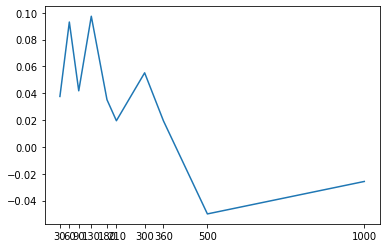

In [31]:
xgrid = [30, 60, 90, 130, 180, 210, 300, 360, 500, 1000]
mean_cv_scores = []
for train_time in xgrid:
    mean_cv_scores.append(objective(train_time, df_added, k=5))
    
plt.plot(xgrid, mean_cv_scores)
plt.xticks(xgrid)

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(xgrid, mean_cv_scores)

# plt.xscale('log')
plt.xticks(xgrid)

130일에서 cv가 가장 높으니 130일로 설정해서 HP 튜닝 간다.

In [32]:
def objective(trial, data, k=7):  # X_scaled, X_scaled_val, y, y_val
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        'objective': 'regression',
        "n_estimators": trial.suggest_categorical("n_estimators", [500, 1000, 2000, 4000, 5000, 10000]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-3, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.9, step=0.1
        ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.9, step=0.1
        ),
        "metric": 'l2',
        "seed": 2022
    }

    tscv = TimeSeriesSplit(n_splits=k, max_train_size=130, test_size=60)

    cv_scores = []
    for i, (train_idx, eval_idx) in enumerate(tscv.split(grid)):
        print()
        print(f'============== Fold {i+1} ================')
        
        X, y = data.drop(columns=['Target']), data[['Target']]
        X_train, X_test = X.loc[grid[train_idx]].reset_index(drop=True), X.loc[grid[eval_idx]].reset_index(drop=True)
        y_train, y_test = y.loc[grid[train_idx]].reset_index(drop=True), y.loc[grid[eval_idx]].reset_index(drop=True)
        
        print("Train Date range: {} to {}".format(grid[train_idx].min(),grid[train_idx].max()))
        print("Valid Date range: {} to {}".format(grid[eval_idx].min(),grid[eval_idx].max()))
        
        X_train, trained_scalers = preprocess_train(X_train)
        X_test = preprocess_inference(X_test, trained_scalers)
        
        
        model = LGBMRegressor(**param_grid)
        model.fit(
            X_train,
            y_train,
            verbose=True
            
        )
        y_pred = model.predict(X_test)
        
#         cv_scores.append(mean_squared_error(y_test, y_pred))
        
        # test - optimize to maximize sharpe ratio
        X_test['Date'] = X.loc[grid[eval_idx]].index
        X_test['predict'] = y_pred
        X_test['Target'] = y_test
        X_test['Rank'] = (X_test.groupby('Date')['predict'].rank(method='first', ascending=False)-1).astype(int)
#         display(X_test.groupby('Date')['Rank'].min())
#         display(X_test.groupby('Date')['Rank'].max())
#         display(X_test)
        eval_score = calc_spread_return_sharpe(X_test)
        cv_scores.append(eval_score)
    print('cv completed with scores:', cv_scores)
    print('mean score:', np.mean(cv_scores))
    return np.mean(cv_scores)



In [33]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

study = optuna.create_study(direction="maximize", study_name="LGBM Regressor")
func = lambda trial: objective(trial, df_added, k=5)
study.optimize(func, n_trials=10)


============== Fold 1 ================
Train Date range: 2020-08-24 to 2021-03-04
Valid Date range: 2021-03-05 to 2021-06-02
[LightGBM] [Warning] lambda_l1 is set=0.5919889619035699, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5919889619035699
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] lambda_l2 is set=9.570906874237072e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.570906874237072e-06
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=8100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8100

============== Fold 2 ================
Train Date range: 2020-11-19 to 2021-06-02
Valid Date range: 2021-06-03 to 2021-08-30
[LightGBM] [Warning] lambda_l1 is set=0.5919889619035699, reg_alpha=0.0 will b

KeyboardInterrupt: 

In [34]:
optuna.visualization.plot_optimization_history(study)

In [35]:
study.best_params

{'n_estimators': 1000,
 'learning_rate': 0.0497652883951982,
 'num_leaves': 227,
 'max_depth': 12,
 'min_data_in_leaf': 500,
 'lambda_l1': 3.060184062092395e-08,
 'lambda_l2': 0.22368531324354038,
 'bagging_fraction': 0.4,
 'feature_fraction': 0.30000000000000004}

In [36]:
study.trials_dataframe().sort_values('value', ascending=False).drop(
        columns=['datetime_start', 'datetime_complete', 'duration'])

,number,value,params_bagging_fraction,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_min_data_in_leaf,params_n_estimators,params_num_leaves,state
6,6,0.140146,0.4,0.3,3.060184e-08,2.236853e-01,0.049765,12,500,1000,227,COMPLETE
2,2,0.125832,0.7,0.8,6.155887e-07,4.382897e+00,0.018619,6,4700,1000,236,COMPLETE
0,0,0.124316,0.6,0.4,5.919890e-01,9.570907e-06,0.055348,12,8100,500,165,COMPLETE
8,8,0.124076,0.5,0.3,4.706040e-02,7.592933e+00,0.303983,10,3100,10000,11,COMPLETE
3,3,0.124028,0.2,0.3,1.414222e-02,7.222250e-07,0.047761,7,5000,500,209,COMPLETE
4,4,0.122213,0.3,0.4,1.485209e-06,1.432262e-06,0.025290,8,8800,4000,240,COMPLETE
5,5,0.119857,0.2,0.4,1.290493e-02,8.037525e-02,0.006838,7,3500,5000,6,COMPLETE
1,1,0.118210,0.3,0.3,3.508213e-07,7.223380e-04,0.119387,3,8000,2000,77,COMPLETE
7,7,0.111293,0.6,0.7,4.031471e-06,5.742659e-01,0.003540,12,1100,2000,175,COMPLETE
9,9,NaN,0.5,0.6,3.139271e-05,2.132438e-05,0.109554,9,4400,4000,50,RUNNING
